In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('heart_disease_uci (1).csv')

In [13]:
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [14]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [15]:
print(df['num'].unique())

[0 2 1 3 4]


In [16]:
target_col = 'num'

In [17]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [18]:
print(df.dtypes)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [19]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR)))] #IQR is 50% Q3 is 75% and Q1 is 25%

In [22]:
print(df.describe(include='all'))

                id         age   sex    dataset            cp    trestbps  \
count   737.000000  737.000000   737        737           737  691.000000   
unique         NaN         NaN     2          3             4         NaN   
top            NaN         NaN  Male  Cleveland  asymptomatic         NaN   
freq           NaN         NaN   558        301           363         NaN   
mean    407.449118   52.905020   NaN        NaN           NaN  132.764110   
std     267.490111    9.485211   NaN        NaN           NaN   17.845982   
min       1.000000   28.000000   NaN        NaN           NaN   92.000000   
25%     188.000000   46.000000   NaN        NaN           NaN  120.000000   
50%     372.000000   54.000000   NaN        NaN           NaN  130.000000   
75%     561.000000   59.000000   NaN        NaN           NaN  140.000000   
max     920.000000   77.000000   NaN        NaN           NaN  200.000000   

              chol    fbs restecg      thalch  exang     oldpeak slope     

In [23]:
heart_disease_by_cp = df.groupby('cp')[target_col].mean()
print(heart_disease_by_cp)

cp
asymptomatic       1.327824
atypical angina    0.156627
non-anginal        0.502994
typical angina     0.609756
Name: num, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_16012\4045331555.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_disease_by_cp = df.groupby('cp')[target_col].mean()


In [24]:
age_by_heart_disease = df.groupby(target_col)['age'].mean()
print(age_by_heart_disease)

num
0    50.075130
1    53.080808
2    59.870968
3    59.391304
4    61.000000
Name: age, dtype: float64


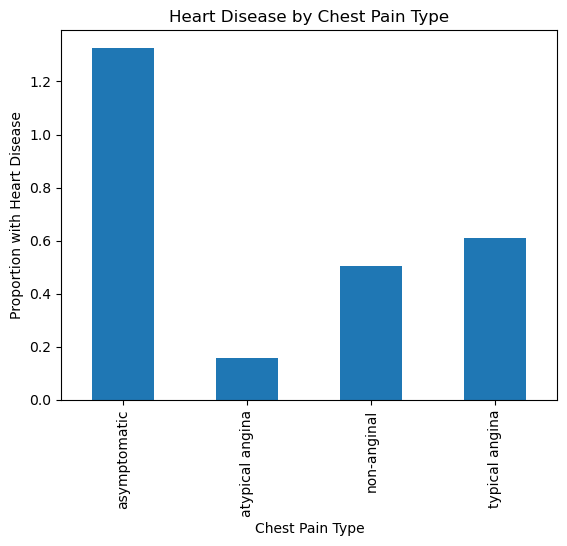

In [25]:
heart_disease_by_cp.plot(kind='bar', title='Heart Disease by Chest Pain Type', xlabel='Chest Pain Type', ylabel='Proportion with Heart Disease')
plt.show()

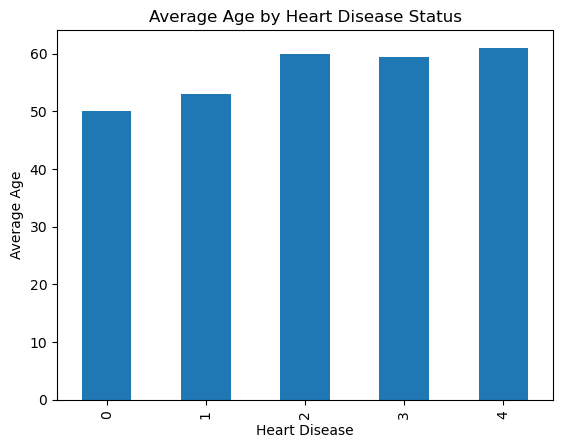

In [26]:
age_by_heart_disease.plot(kind='bar', title='Average Age by Heart Disease Status', xlabel='Heart Disease', ylabel='Average Age')
plt.show()

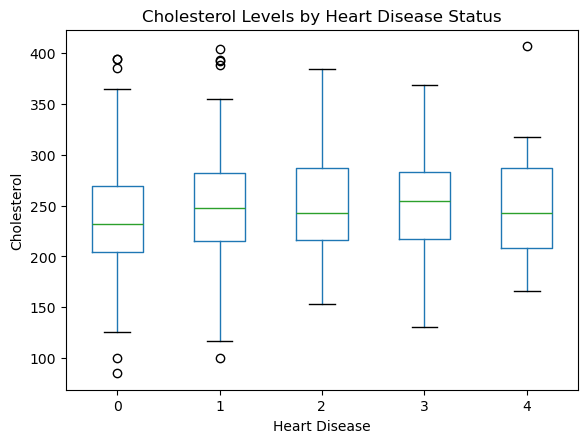

In [27]:
df.boxplot(column='chol', by=target_col, grid=False)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.suptitle('')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

D:\Coding\Anaconda\Anaconda Download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Coding\Anaconda\Anaconda Download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Coding\Anaconda\Anaconda Download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Coding\Anaconda\Anaconda Download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

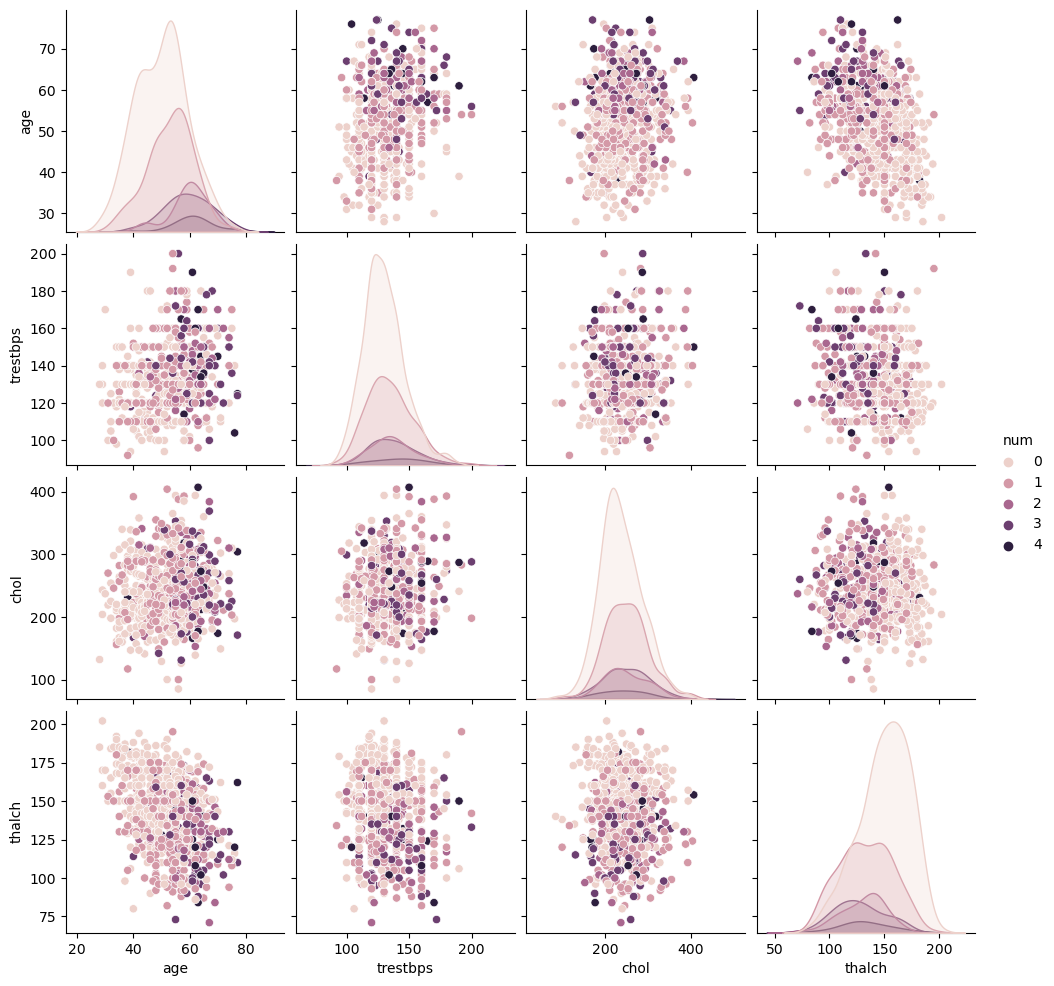

In [28]:
sns.pairplot(df, hue=target_col, vars=['age', 'trestbps', 'chol', 'thalch'])
plt.show()

In [29]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [30]:
correlation_matrix = df[numeric_columns].corr()

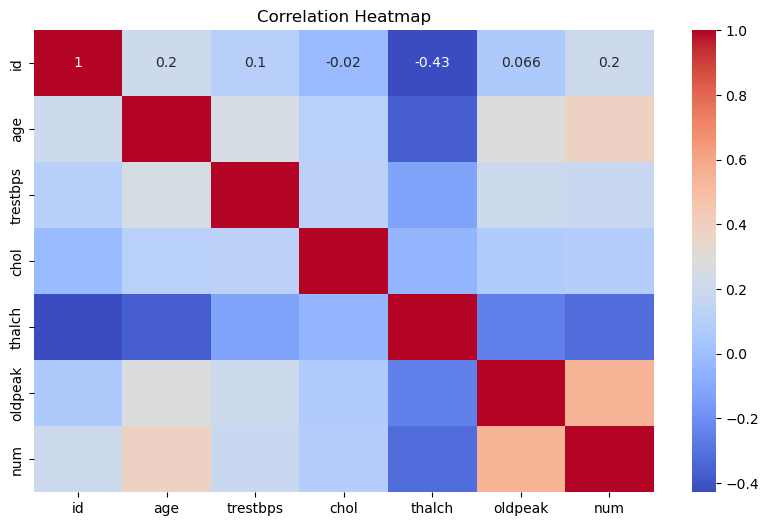

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()